Chapter 10

# 一元多项式回归
《线性代数》 | 鸢尾花书：数学不难

这段代码完整地实现了**一元三次多项式回归**的建模、拟合、预测和可视化过程。下面我们从数学角度详细描述这段代码背后在做什么，并结合公式帮助理解。

---

首先，代码使用 `numpy` 构造了一个二维数据集，表示一组散点数据。输入变量为 $x$，是一个 $8 \times 1$ 的列向量；输出变量为 $y$，是对应的目标值。它们的关系即为我们要拟合的对象。

$$
x = \begin{bmatrix}1 \\ 2 \\ 4 \\ 5 \\ 6 \\ 7 \\ 8 \\ 9 \end{bmatrix}, \quad
y = \begin{bmatrix}1 \\ 7 \\ 8 \\ 6 \\ 5 \\ 2 \\ 2 \\ 4 \end{bmatrix}
$$

为了在一张图上画出平滑的回归曲线，代码使用 `np.linspace` 在区间 $[0, 10]$ 上生成了 101 个点构成的向量 $x_\text{array}$，作为可视化时的横坐标。

---

### 一、设计矩阵构造

为了进行三次多项式回归，代码根据变量 $x$ 构造了一个设计矩阵 $X_\text{poly}$。该设计矩阵包含如下列：

- 第1列：常数项 1，对应偏置 $b_0$
- 第2列：$x$，对应一次项系数 $b_1$
- 第3列：$x^2$，对应二次项系数 $b_2$
- 第4列：$x^3$，对应三次项系数 $b_3$

因此，设计矩阵的数学形式为：

$$
X = 
\begin{bmatrix}
1 & x_1 & x_1^2 & x_1^3 \\
1 & x_2 & x_2^2 & x_2^3 \\
\vdots & \vdots & \vdots & \vdots \\
1 & x_n & x_n^2 & x_n^3 \\
\end{bmatrix}
$$

其中 $n = 8$ 是样本个数。

---

### 二、最小二乘法求解参数

代码使用正规方程（Normal Equation）求解最小二乘解：

$$
\mathbf{b} = (X^\top X)^{-1} X^\top y
$$

向量 $\mathbf{b}$ 为模型参数，包含了常数项 $b_0$ 和多项式系数 $b_1, b_2, b_3$，即：

$$
\mathbf{b} = 
\begin{bmatrix}
b_0 \\
b_1 \\
b_2 \\
b_3
\end{bmatrix}
$$

---

### 三、模型拟合与预测

用训练集数据 $X_\text{poly}$ 去预测回归值：

$$
\hat{y} = X_\text{poly} \cdot \mathbf{b}
$$

同时，为绘制回归曲线，需要对 101 个新的点 $x_\text{array}$ 执行相同的特征扩展，并构造矩阵 $X_{\text{array, poly}}$，结构与 $X_\text{poly}$ 相同。然后执行：

$$
\hat{y}_{\text{array}} = X_{\text{array, poly}} \cdot \mathbf{b}
$$

这样就得到一条连续平滑的回归曲线，用于图形展示。

---

### 四、图形可视化

最后，代码使用 `matplotlib` 进行绘图，主要展示了三类内容：

1. 原始数据点（蓝色叉号）
2. 模型预测点 $\hat{y}$（红色叉号）
3. 真实值和预测值之间的误差线（黄色透明线段）

此外，通过画出 $(x_\text{array}, \hat{y}_\text{array})$ 的连续点连接线，得到红色的三次回归曲线。

为了增强几何直观性，图像设置了相等比例，网格、坐标轴刻度均对称，确保读者能直观理解模型是如何拟合这些数据点的。

---

### 总结

从数学视角看，这段代码通过将输入数据 $x$ 构造为多项式特征矩阵 $X$，并利用正规方程求解最小二乘解 $\mathbf{b}$，实现了一个完整的三次多项式回归建模过程。其核心是把非线性的回归问题转化为线性模型在高维特征空间上的线性拟合过程。整个过程体现了**线性模型 + 非线性特征变换 = 非线性拟合能力**这一关键思想。

## 初始化

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 构造数据

In [6]:
data = np.array([[1, 1],
                 [2, 7],
                 [4, 8],
                 [5, 6],
                 [6, 5],
                 [7, 2],
                 [8, 2],
                 [9, 4]])
x = data[:,[0]]
y = data[:,[1]]

In [7]:
# 用于绘制回归曲线
x_array = np.linspace(0,10,101).reshape(-1,1)

## 设计矩阵

In [9]:
degree = 3 # 设定阶数

# 增加不同阶数的数据
X_poly = [x**d for d in range(1, degree + 1)]
X_poly = np.hstack(X_poly)

# 最左侧加一列全1
X_poly = np.hstack([np.ones_like(x), X_poly])  

In [10]:
X_poly

array([[  1,   1,   1,   1],
       [  1,   2,   4,   8],
       [  1,   4,  16,  64],
       [  1,   5,  25, 125],
       [  1,   6,  36, 216],
       [  1,   7,  49, 343],
       [  1,   8,  64, 512],
       [  1,   9,  81, 729]])

## 求解模型

In [12]:
b = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
b

array([[-8.53960964],
       [12.2117907 ],
       [-2.64302613],
       [ 0.16010855]])

In [13]:
# 提取参数
coef = b[1:,:]
intercept = b[0,:]

In [14]:
intercept

array([-8.53960964])

In [15]:
coef[0][0]

12.211790696865584

## 拟合

In [17]:
y_poly_pred = X_poly @ b
y_poly_pred

array([[1.18926347],
       [6.59273562],
       [8.26608218],
       [6.45725916],
       [4.16564033],
       [2.35187698],
       [1.97662039],
       [4.00052187]])

In [18]:
X_array_poly = [x_array**d for d in range(1, degree + 1)]
X_array_poly = np.hstack(X_array_poly)
X_array_poly = np.hstack([np.ones_like(x_array), X_array_poly])  # 最左侧加一列全1

In [19]:
# 多项式回归曲线纵轴预测值
y_array_pred = X_array_poly @ b

## 可视化

(0.0, 10.0)

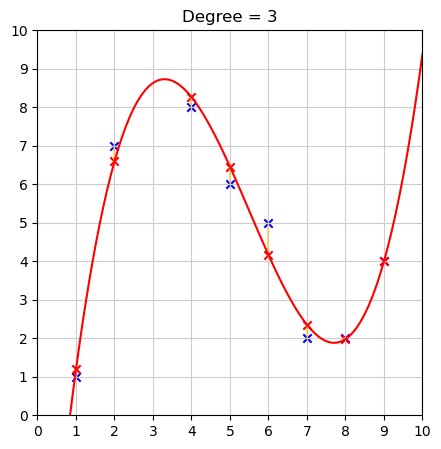

In [21]:
fig, ax = plt.subplots(figsize=(5,5))

# 绘制散点图
ax.scatter(x, y, marker = 'x', color = 'b')
ax.scatter(x, y_poly_pred, marker = 'x', color='r')

# 绘制误差
data_ = np.column_stack([x,y_poly_pred])
ax.plot(([i for (i,j) in data_], [i for (i,j) in data]),
        ([j for (i,j) in data_], [j for (i,j) in data]),
         c='#FFC000', alpha = 0.5)

# 绘制回归曲线
ax.plot(x_array, y_array_pred, color='r')
ax.set_title('Degree = %d' % degree)

ax.set_aspect('equal', adjustable='box')
ax.set_xticks(np.arange(11))
ax.set_yticks(np.arange(11))
ax.set_xlim(0,10)
ax.grid(True, c = '0.8')
ax.set_ylim(0,10)

## 回归解析式

In [23]:
equation = '$y = {:.3f}'.format(intercept[0])
for j in range(0, len(coef[:,0])):
    equation += ' + {:.3f}x^{}'.format(coef[j][0], j+1)
equation += '$'
equation = equation.replace("+ -", "-")
print(equation)
print(str(b))

$y = -8.540 + 12.212x^1 -2.643x^2 + 0.160x^3$
[[-8.53960964]
 [12.2117907 ]
 [-2.64302613]
 [ 0.16010855]]


作者	**生姜DrGinger**  
脚本	**生姜DrGinger**  
视频	**崔崔CuiCui**  
开源资源	[**GitHub**](https://github.com/Visualize-ML)  
平台	[**油管**](https://www.youtube.com/@DrGinger_Jiang)		
		[**iris小课堂**](https://space.bilibili.com/3546865719052873)		
		[**生姜DrGinger**](https://space.bilibili.com/513194466)  